<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Play-Store-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Problem Statement<b>
## <b>The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

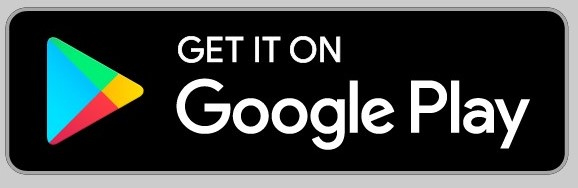

In [ ]:
Title_of_the_project= "abc"

In [ ]:
# Importing necessary libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## **Let's mount our data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Store the data in a variable and view it
data1='/content/drive/MyDrive/capstone project/Copy of Play Store Data.csv'
data2='/content/drive/MyDrive/capstone project/Copy of User Reviews.csv'
play_store = pd.read_csv(data1)
user_review = pd.read_csv(data2)
play_store.head()
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## **Determining number of rows and columns of play store data**

In [ ]:
# Determining the shape of play store data
print(f'number of rows:{play_store.shape[0]}')
print(f'number of columns:{play_store.shape[1]}')

number of rows:10841
number of columns:13


## **determining number of rows and columns of user review data**

In [24]:
# Determining the shape of user review  data
print(f'number of rows:{user_review.shape[0]}')
print(f'number of columns:{user_review.shape[1]}')

number of rows:64295
number of columns:5


## **Let's just dig into the data a bit more!!**


In [ ]:
# Columns is an attribute that returns column labels, which helps to understand which column contains what type of information.
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [25]:
# similarly we will be finding out column labels for user review data as well .
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [26]:
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# Defining a function to to determine number of null values,unique values and data type of all values
def give_info():
  extra_info = pd.DataFrame(index=play_store.columns)
  extra_info['data_type'] = play_store.dtypes
  extra_info['null_count'] = play_store.isnull().sum()
  extra_info['unique_count'] = play_store.nunique()
  return extra_info
  

In [ ]:
give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120








*   This shows that this data contains 1474 null values in rating column, current ver has 8, android ver has 3, content rating and type each have 1 null value.
*   Only rating has numeric values in the form of floats.





In [27]:
# Defining a function to to determine number of null values,unique values and data type of all values for user review data.
def return_info():
  more_info = pd.DataFrame(index=user_review.columns)
  more_info['data_type'] = user_review.dtypes
  more_info['null_count'] = user_review.isnull().sum()
  more_info['unique_count'] = user_review.nunique()
  return more_info

In [28]:
return_info()

,data_type,null_count,unique_count
App,object,0,1074
Translated_Review,object,26868,27994
Sentiment,object,26863,3
Sentiment_Polarity,float64,26863,5410
Sentiment_Subjectivity,float64,26863,4474


# **Dealing with null values in play store data**

In [ ]:
def impute_median(series):
  return series.fillna(series.median)

In [ ]:
# Replacing null values in rating column with median of all values present in that column
play_store.Rating=play_store['Rating'].transform(impute_median)

In [ ]:
# Removing/droping the row containg null value for the column content rating
play_store[play_store['Content Rating'].isna()]
play_store.drop([10472],inplace=True)

In [ ]:
# Null values of type,Current Ver,Android Ver, columns are replaced with mode of respective columns.
# Mode is most recurring value of that particular column, so null values are being replaced by mode.
play_store['Type'].fillna(str(play_store['Type'].mode().values[0]),inplace=True)
play_store['Current Ver'].fillna(str(play_store['Current Ver'].mode().values[0]),inplace=True)
play_store['Android Ver'].fillna(str(play_store['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
# Check if still null values are present
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# **Dealing with null values in user review data**

In [29]:
# Replacing null values in sentiment polarity column with median of all values present in that column
user_review.Sentiment_Polarity=user_review['Sentiment_Polarity'].transform(impute_median)

In [30]:
# Replacing null values in Sentiment_Subjectivity column with median of all values present in that column
user_review.Sentiment_Subjectivity=user_review['Sentiment_Subjectivity'].transform(impute_median)

In [31]:
# Null values of type,Current Ver,Android Ver, columns are replaced with mode of respective columns.
user_review['Sentiment'].fillna(str(user_review['Sentiment'].mode().values[0]),inplace=True)

In [32]:
# Check if still null values are present
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

# **What is to be cleaned?**

### *   Reviews: It has to be a numerical column and datatype into int/float

### *   Size: Every Entry has "M" and "K" which needs to be removed and datatype into int/float
### *   Installs: Every entry has "+" at the end which needs to be removed and datatype into int/float also it has entries like "Free"

### *   Price: It has "S" at the begining it needs to be cleaned and datatype into int/float
### *   Last Updated: it is date time column,datatype shouldbe changed accordingly and in feature engineering we will splitt the column into year and month

### *   Current Ver: The entries are 1.0.1,1.2.1,1.2 so we will make it 101,121,120, correct upto 3 places
### *   Android Ver: we will remove "And up" from the end and making 4.0.3 as 403




### **Review Column**

In [19]:
# # Columns review should be of int type
# play_store['Reviews'] = pd.to_numeric(play_store['Reviews'],errors='coerce')
# give_info()

### **Size Column**

In [ ]:
# Removing the ',' and '+' Signs
play_store['Size'] = play_store.Size.apply(lambda x: x.strip('+'))
play_store['Size'] = play_store.Size.apply(lambda x: x.replace(',', ''))

In [20]:
# Convert M to Mega
play_store['Size'] = play_store.Size.apply(lambda x: x.replace('M', 'e+6'))

# Convert the K to Kilo
play_store['Size'] = play_store.Size.apply(lambda x: x.replace('k', 'e+3'))

# Replacing the Varies with device value with Nan
play_store['Size'] = play_store.Size.replace('Varies with device', np.NaN)

In [22]:
# Convert Size Column from object to integer
play_store['Size'] = pd.to_numeric(play_store['Size'])
give_info()

TypeError: ignored

### **Installs Column**

In [ ]:
#Remove '+' sign from 
play_store['Installs'] = play_store.Installs.apply(lambda x: x.strip('+'))

# Remove the ',' from the numbers.
play_store['Installs'] = play_store.Installs.apply(lambda x: x.replace(',', ''))

# Convert it from string type to numeric type
play_store['Installs'] = pd.to_numeric(play_store['Installs'])

### **Price Column**

In [ ]:
# Remove'$' sign
play_store['Price'] = play_store.Price.apply(lambda x: x.strip('$'))

# Convert the values to Numeric type.
play_store['Price'] = pd.to_numeric(play_store['Price'])

TypeError: ignored